### Import

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import scienceplots
plt.style.use(['science','notebook','grid'])


c:\FAKS\MAGISTERIJ\MODELSKA_ANALIZA_1\MA1 naloge\MA-ZaključnaNaloga\main\code\PPS_photon_propagation_simulation


import MAC (mass attenutation coeffs) from NIST XCOM
-

In [26]:
import importlib
from src import LinearAttenuationCoefficients

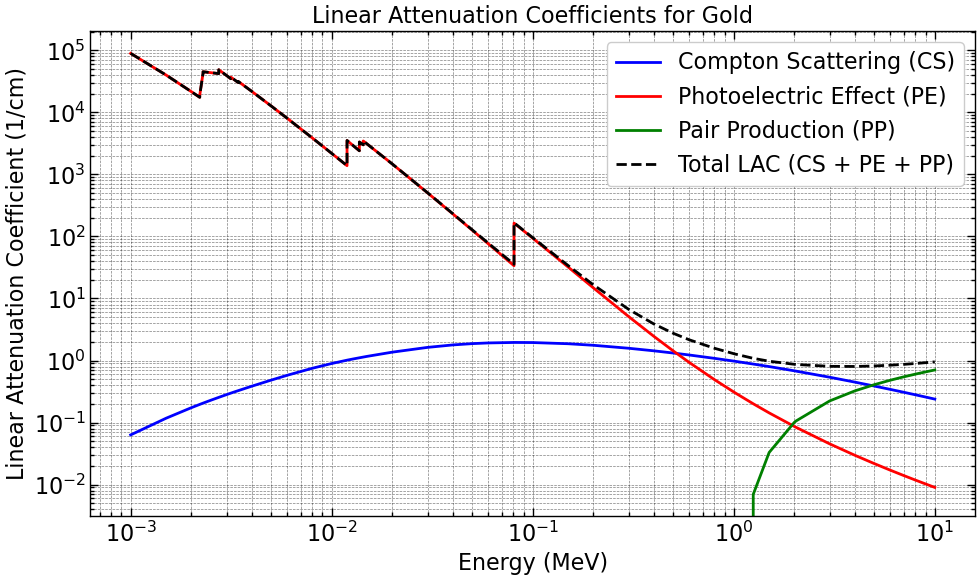

In [29]:
importlib.reload(LinearAttenuationCoefficients)

path = "../mac_nistxcom/mac_gold.txt"
gold_density = 19.32  # g/cm^3

gold_lac_importer = LinearAttenuationCoefficients.LACLoader(path, gold_density, material_name="Gold")

energy, lac_pp, lac_cs, lac_pe, lac_total = gold_lac_importer.get_lac_data()

gold_lac_importer.plot()


In [ ]:
importlib.reload(LinearAttenuationCoefficients)

path = "../mac_nistxcom/mac_gold.txt"
gold_density = 19.32  # g/cm^3

gold_lac_importer = LinearAttenuationCoefficients.LACLoader(path, gold_density, material_name="Gold")

energy, lac_pp, lac_cs, lac_pe, lac_total = gold_lac_importer.get_lac_data()

gold_lac_importer.plot()

In [ ]:
fp = "mac_tissue_with_0.02massfraction_gold.txt"
gold_mf = 0.02 # mass fraction of gold in the mixture

tissue_density = 1.06 # g/cm^3 for Soft Tissue
gold_density = 19.32  # g/cm^3 for Gold
density_mix = (1-gold_mf)*tissue_density + gold_mf*gold_density 
print(f"Density of the mixture: {density_mix} g/cm^3")
tissue_lac_initializer = LACLoader(fp, density_mix, "Soft Tissue with Gold")
# label: st_2au == "Soft Tissue with 2% mass fraction of Gold" 
st_2au_energy, st_2au_lac_pp, st_2au_lac_cs, st_2au_lac_pe, st_2au_lac_total_simulation = tissue_lac_initializer.get_lac_data()
tissue_lac_initializer.plot()

Density of the mixture: 1.4252 g/cm^3


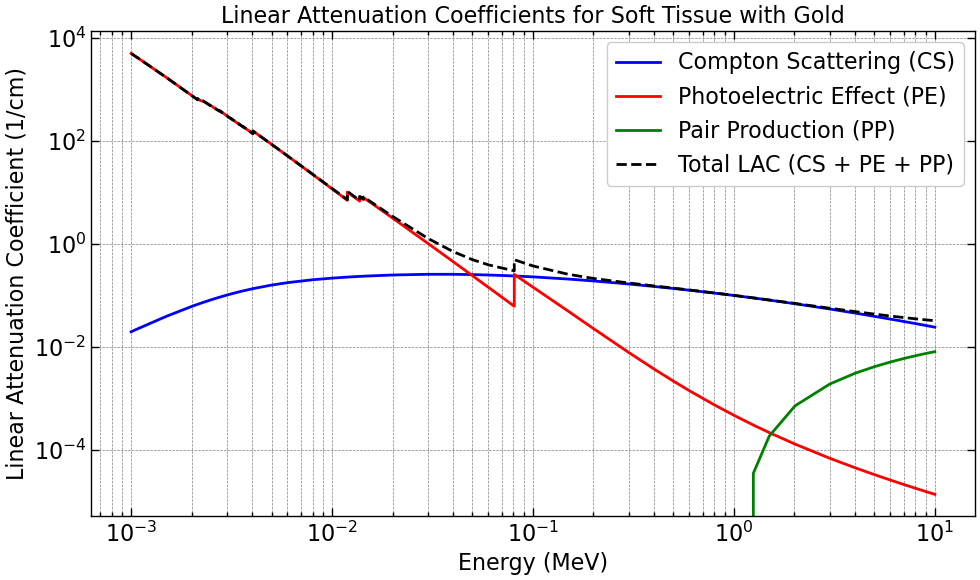

In [3]:
fp = "mac_tissue_with_0.02massfraction_gold.txt"
gold_mf = 0.02 # mass fraction of gold in the mixture

tissue_density = 1.06 # g/cm^3 for Soft Tissue
gold_density = 19.32  # g/cm^3 for Gold
density_mix = (1-gold_mf)*tissue_density + gold_mf*gold_density 
print(f"Density of the mixture: {density_mix} g/cm^3")
tissue_lac_initializer = LACLoader(fp, density_mix, "Soft Tissue with Gold")
# label: st_2au == "Soft Tissue with 2% mass fraction of Gold" 
st_2au_energy, st_2au_lac_pp, st_2au_lac_cs, st_2au_lac_pe, st_2au_lac_total_simulation = tissue_lac_initializer.get_lac_data()
tissue_lac_initializer.plot()


-----------------
1. lead - of no use here ...

Material: Lead


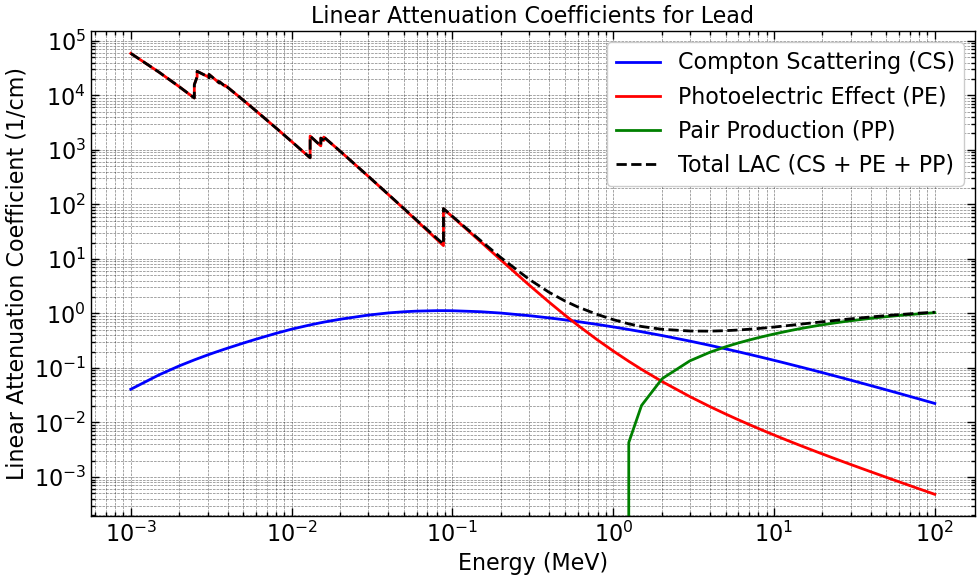

In [27]:
print("Material: Lead")
lead_filepath = "mac_lead.txt"
lead_density = 11.34  # g/cm^3 for Lead
lead_lac_initializer = LACLoader(lead_filepath, lead_density, "Lead")
lead_energy, lead_lac_pp, lead_lac_cs, lead_lac_pe, lead_lac_total_simulation = lead_lac_initializer.get_lac_data()
lead_lac_initializer.plot()


-------------------------
2. soft tissue

Material: Soft Tissue


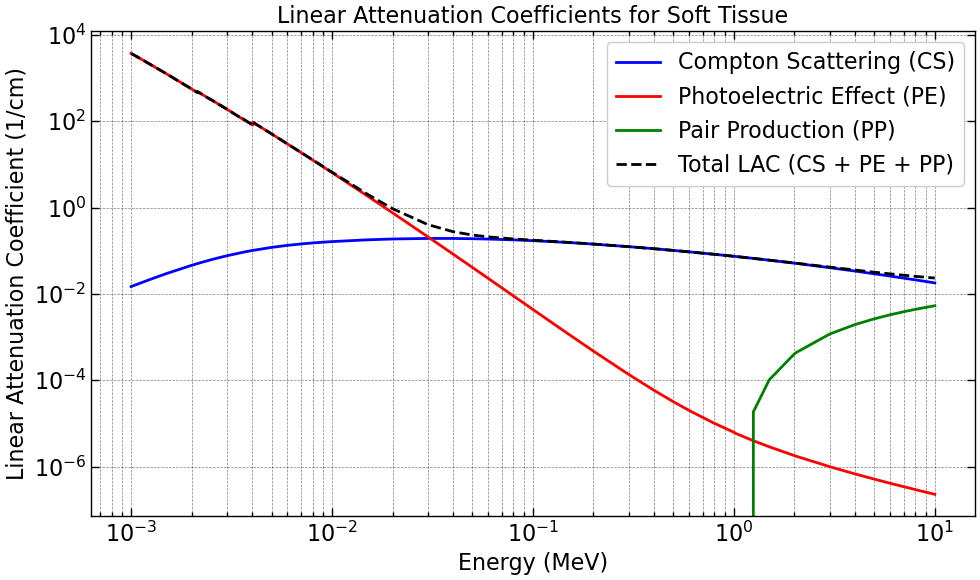

In [3]:
"""
TISSUES COMPOSITION (elements by weight and abundance fractions): 
Element 	  Weight %	  Atomic %	Notes
O       	      61.0	      25.5	Water, organic molecules
C       	      23.0	       9.5	Organic structures
H       	      10.2	      63.0	Water, hydrocarbons
N       	       2.6	       1.4	Proteins, DNA
Ca      	       1.4	      0.22	Bones, signaling
P       	       1.1	      0.22	DNA, bones (phosphate)
K       	       0.2	      0.03	Electrolyte
S       	       0.2	     0.038	Proteins (cysteine, methionine)
Na      	      0.14	      0.02	Electrolyte
Cl      	      0.12	      0.02	Electrolyte
Mg      	     0.027	     0.003	Enzymes, bones
Fe      	     0.006	    0.0001	Hemoglobin
Zn      	     0.003	     4e-05	Enzymes
Cu      	    0.0001	     1e-05	Trace metal
I       	   1.6e-05	     1e-06	Thyroid hormone
Se      	   1.9e-05	     1e-06  Antioxidans
 """
print("Material: Soft Tissue")

# Load the data from the txt file
tissue_filepath = 'mac_tissue.txt'
# coorected MAC - need to use weight fractions of elements in tissue, not by abundance fractions
tissue_filepath = "mac_tissue_corrected.txt"

tissue_density = 1.06  # g/cm^3 for Soft Tissue
tissue_lac_initializer = LACLoader(tissue_filepath, tissue_density, "Soft Tissue")
energy_tissue, lac_pp_tissue, lac_cs_tissue, lac_pe_tissue, lac_total_simulation_tissue = tissue_lac_initializer.get_lac_data()
tissue_lac_initializer.plot()


what is LAC for soft tissue at rtg spectrum? 

In [5]:
print("""
Takehome messages:
- Compton scattering (CS) is dominant in tissue above approximately 30 keV, and up to >10 MeV.
- Diagnostic photon spectrum ranges from 10 keV to 150 keV:
    -> 10–30 keV: Photoelectric effect is dominant; at 10 keV, mean free path λ = 1/μ ≈ 1/8 cm ≈ 1 mm – local absorption, followed by Auger electron emission, resulting in total local energy deposition.
    -> 30–150 keV: Compton scattering is dominant;
        * Broad, quasi-constant μ up to 100 keV; λ ≈ 5 cm, so scattering will occur, but with much less chance, resulting in a more penetrating beam.
        * Above 100 keV, even smaller μ, more penetration.
    -> To be explored: angle and energy transfer of CS at these energies, to better understand the typical dynamics of CS in tissue at those ranges, where α = E_gamma / m_electron << 1.

2. Therapeutic photon beams (6–18 MV) are in the range 1–10 MeV, where Compton scattering is dominant, but pair production starts to play a role.
    Typical voltages: 6, 10, 15, 18 MV, with 6 MV most common for radiotherapy.
    Therefore, we deal mostly with energies around 1 MeV, but also up to ~5 MeV; higher energies are less probable – here pair production becomes slowly important, but still not dominant.
    From 30 keV up to 10 MeV, Compton is totally dominant; in those ranges, μ falls from 0.2/cm to 0.02/cm (approx.), meaning mean free path:

----------Further analysis----------
Between 50 keV and 10 MeV, only Compton is relevant. Mean free paths of photons with different energies in CS-dominant range:
  - ~5 cm at 30 keV (μ ≈ 0.2/cm) – but here also PE has similar μ, so together ~2.5 cm (μ_cs ≈ μ_pe)
  - Slowly falls towards 6 cm at ~60 keV
  - ~7 cm at 100 keV (μ ≈ 0.15/cm)
  - ~8 cm at 200 keV (μ ≈ 0.125/cm)
  - ~10 cm at 500 keV (μ ≈ 0.1/cm)
  - ~12.5 cm at 1 MeV (μ ≈ 0.075/cm)
  - Then starts decreasing faster; ~25 cm at 3 MeV (μ ≈ 0.04/cm)
  - ~50 cm at 10 MeV (μ ≈ 0.02/cm)

--------Further considerations (Attix book – Compton scattering)---------
What are typical scattering angles and energy transfer ratios in Compton scattering?
Much depends on the energy of the incident photon; parameter α = E_gamma / m_electron.
  -- Regarding scattering angles (page 131):
At all energies, most photons will scatter forward. There is a drop in probability of scattering towards 90 degrees.
Forward scattering preserves most photon energy; backscattering means minimal preserved energy, with fraction 1 / (1 + 2α).
For low energies (up to 100 keV), there is a rise from 90 to 180 degrees. For E < ~50 keV, almost symmetrical cross section around π/2.
As energies rise, less probability for scattering backwards. At 1 MeV, approximately constant cross section for all angles above π/2 to π.
For 10 MeV, cross section for forward is 800 mb/sr, 20 mb/sr for 90°, and 10 mb/sr for 180°.
Electron scattering angle? Up to 100 keV, approximately π/2 – θ/2, linear dependence.

------Mean energy transfer to electron? (page 135)-----
At 10 keV, almost no energy transfer – also, for high-Z materials like lead, there is not enough energy for CS for inner 2 electrons, bound at ~90 keV, also L electrons at ~15 keV!
At 100 keV, ~12% energy goes to electron; at 200 keV, 20%; at 600 keV, 35%; at 1 MeV, 45%; at 10 MeV, 70%.
More detailed scattering considerations are complex and require non-trivial integration.

Regarding CT imaging and RT, what are the differences?
At CT energies, scattering angles might be large, direction can change significantly – also, energy transfer is small, so multiple CS before PE/escape is likely.
For mammography (10–20 keV), PE dominates! Low-energy photons are filtered out as they would just contribute to dose (same for CT, RT, ...).
For RT spectrum, energies are much higher – total CS domination, scattering angles are small, so energy is mostly deposited in a narrow beam, exponential intensity drop.
In this sense, the energy deposition profile is very close to what we would get if the only interaction was absorption (like PE).

In tissue (low-Z), after PE, Auger electrons are emitted (fluorescence yield is practically 0 for Z < 10), rising to 20% at Z = 20, 50% at Z = 30, 90% at Z = 60 (Attix 143).
So in tissue, after PE, no fluorescence. This is different for high-Z materials, where PE is dominant to higher energies (lead: Z = 82, μ_cs = μ_pe at 450 keV – compare to tissue).
K line for lead is at 90 keV; after PE, characteristic fluorescence photon is emitted at ~70 keV. This photon will be absorbed via PE, mean free path is 0.3 mm (μ = 30/cm), so instantly absorbed, and Auger effect occurs as now L line PE takes place.
So, even if fluorescence occurs, energy will indeed be deposited locally!
To sum up: in low-Z materials, Auger effect takes place after PE; in high-Z materials, fluorescence occurs. But energy is deposited locally in both cases. The only difference is that in low-Z materials, CS will quickly start dominating, likely causing multiple scattering with small energy transfer and large scattering angles, so the beam will be more penetrating and energy will be dispersed out from the initial beam direction.

---> This leads to a possible imaging modality: XRF imaging.
XRF imaging is based on fluorescence emission after PE, possible only in high-Z materials, where fluorescence yield is high enough and energy of emitted photons is high enough to be detected.
The idea: put high-Z material in tissue, then irradiate with X-rays. The fluorescence photon may not be immediately absorbed as it now travels through tissue.
For Au (similar to lead, similar Z), we have 67, 69, 77, and 78 keV fluorescence lines. Mean free path of those photons in tissue? Around 6 cm. So, not perfect, but some could escape and be detected.
Also to consider: is μ at K-line similar for Au and Pb? I think so, but shall check...
""")



Takehome messages:
- Compton scattering (CS) is dominant in tissue above approximately 30 keV, and up to >10 MeV.
- Diagnostic photon spectrum ranges from 10 keV to 150 keV:
    -> 10–30 keV: Photoelectric effect is dominant; at 10 keV, mean free path λ = 1/μ ≈ 1/8 cm ≈ 1 mm – local absorption, followed by Auger electron emission, resulting in total local energy deposition.
    -> 30–150 keV: Compton scattering is dominant;
        * Broad, quasi-constant μ up to 100 keV; λ ≈ 5 cm, so scattering will occur, but with much less chance, resulting in a more penetrating beam.
        * Above 100 keV, even smaller μ, more penetration.
    -> To be explored: angle and energy transfer of CS at these energies, to better understand the typical dynamics of CS in tissue at those ranges, where α = E_gamma / m_electron << 1.

2. Therapeutic photon beams (6–18 MV) are in the range 1–10 MeV, where Compton scattering is dominant, but pair production starts to play a role.
    Typical voltages: 6, 10, 

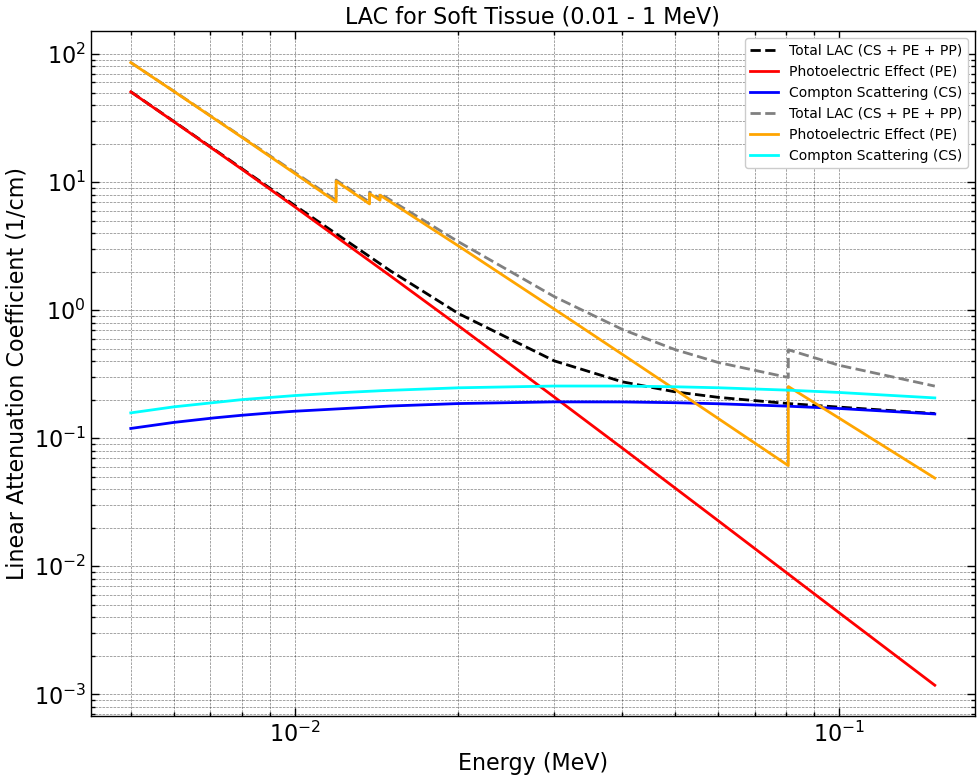

In [25]:
plt.figure(figsize=(10, 8))

# Plot the LACs for Soft Tissue in the specified energy range
Emin = 0.005
Emax = 0.15
energy_mask = (energy_tissue >= Emin) & (energy_tissue <= Emax)
plt.plot(energy_tissue[energy_mask], lac_total_simulation_tissue[energy_mask], label='Total LAC (CS + PE + PP)', color='black', linestyle='--')
plt.plot(energy_tissue[energy_mask], lac_pe_tissue[energy_mask], label='Photoelectric Effect (PE)', color='red')
plt.plot(energy_tissue[energy_mask], lac_cs_tissue[energy_mask], label='Compton Scattering (CS)', color='blue')

# Add data for tissue with 2% mass fraction of Au
energy_mask_2au = (st_2au_energy >= Emin) & (st_2au_energy <= Emax)
plt.plot(st_2au_energy[energy_mask_2au], st_2au_lac_total_simulation[energy_mask_2au], label='Total LAC (CS + PE + PP)', color='gray', linestyle='--')
plt.plot(st_2au_energy[energy_mask_2au], st_2au_lac_pe[energy_mask_2au], label='Photoelectric Effect (PE)', color='orange')
plt.plot(st_2au_energy[energy_mask_2au], st_2au_lac_cs[energy_mask_2au], label='Compton Scattering (CS)', color='cyan')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy (MeV)')
plt.ylabel('Linear Attenuation Coefficient (1/cm)')
plt.title('LAC for Soft Tissue (0.01 - 1 MeV)')
plt.legend(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()



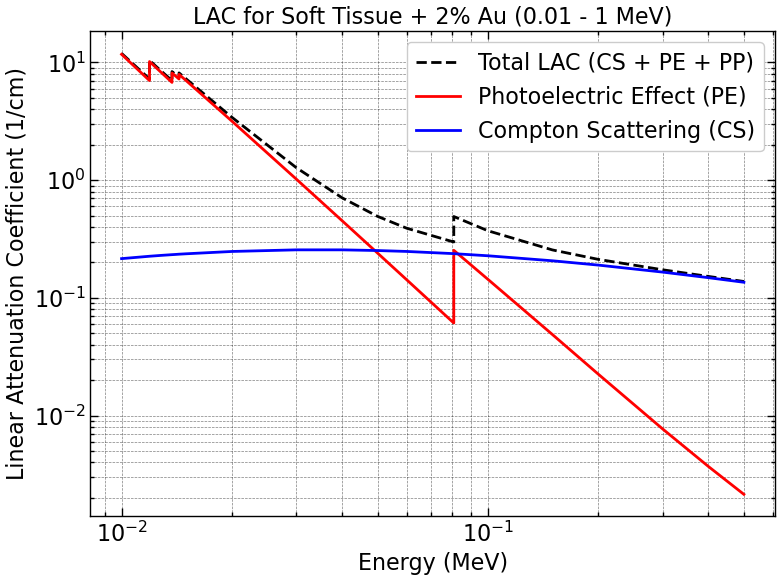

In [18]:
# Select energy range between 0.01 MeV and 1 MeV for tissue with 2% Au
energy_mask_2au = (st_2au_energy >= 0.01) & (st_2au_energy <= 0.5)
plt.figure(figsize=(8, 6))

plt.plot(st_2au_energy[energy_mask_2au], st_2au_lac_total_simulation[energy_mask_2au], label='Total LAC (CS + PE + PP)', color='black', linestyle='--')
plt.plot(st_2au_energy[energy_mask_2au], st_2au_lac_pe[energy_mask_2au], label='Photoelectric Effect (PE)', color='red')
plt.plot(st_2au_energy[energy_mask_2au], st_2au_lac_cs[energy_mask_2au], label='Compton Scattering (CS)', color='blue')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy (MeV)')
plt.ylabel('Linear Attenuation Coefficient (1/cm)')
plt.title('LAC for Soft Tissue + 2% Au (0.01 - 1 MeV)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()